In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import imblearn
import seaborn as sn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_learning_curves
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from mlxtend.evaluate import bias_variance_decomp

# Load dataset

In [2]:
df = pd.read_csv('mfeat-morphological_csv.csv')
df

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,1
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,1
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,1
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,1
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,1
...,...,...,...,...,...,...,...
1995,1.0,1.0,1.0,157.498861,1.655794,5326.025889,10
1996,1.0,1.0,1.0,152.404861,1.620345,5243.267754,10
1997,1.0,1.0,1.0,134.672861,1.541987,3766.763222,10
1998,1.0,1.0,1.0,142.926861,1.426381,4118.327320,10


# Plot to see if there's outliers

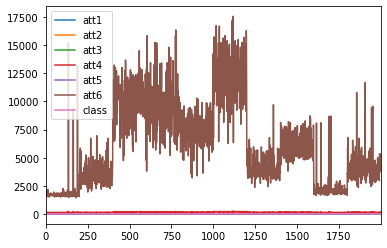

In [3]:
df.plot()

# Check if there's missing data (NaN)

In [4]:
df.isnull().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
class    0
dtype: int64

# Delete spaces in dataset

In [43]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

# Heatmap to check the values correspondence

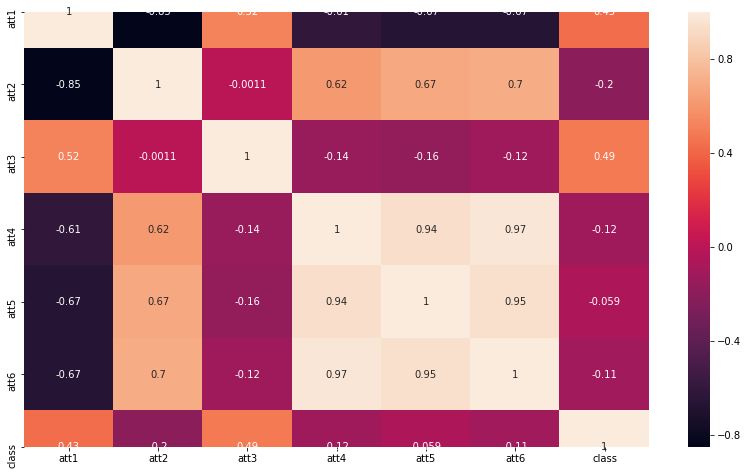

In [6]:
plt.figure(figsize = (14,8))
corr = df.corr()
sn.heatmap(corr,annot = True)

# Put features in X

In [44]:
cols = df.columns 
X = df.iloc[:,:-1].values
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33150861e+02,
        1.31169276e+00, 1.62022178e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26724861e+02,
        1.30274497e+00, 1.60933482e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.31173861e+02,
        1.31903101e+00, 1.56897843e+03],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.34672861e+02,
        1.54198735e+00, 3.76676322e+03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.42926861e+02,
        1.42638097e+00, 4.11832732e+03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.33920861e+02,
        1.56462053e+00, 3.80802132e+03]])

# Put goal in y

In [45]:
y = df.iloc[:,6].values
y

array([ 1,  1,  1, ..., 10, 10, 10], dtype=int64)

# Check the unique values of traget class

In [9]:
df['class'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

# Delete spaces in data

In [10]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

# Splite data into train and test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply SVC (Support Vector Classifier)

In [12]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = svclassifier.predict(X_test)

# Print the confusion matrix and score accuracy

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56  0  1  0  0  0  0  0  0  0]
 [ 0 50  0  0  6  0  0  6  0  0]
 [ 0  0 46  0  1  6  0  1  0  0]
 [ 0  1  9 31  5  8  0  5  0  0]
 [ 0  1  3 13 44  0  0  6  0  0]
 [ 0  0  9  4  1 39  0  1  0  0]
 [ 0  1  0  0  0  0 11  0  0 50]
 [ 0  1  1  3  2  0  0 50  0  0]
 [ 0  0  0  0  0  0  2  0 64  1]
 [ 0  1  0  0  0  0 26  0  0 34]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        57
           2       0.91      0.81      0.85        62
           3       0.67      0.85      0.75        54
           4       0.61      0.53      0.56        59
           5       0.75      0.66      0.70        67
           6       0.74      0.72      0.73        54
           7       0.28      0.18      0.22        62
           8       0.72      0.88      0.79        57
           9       1.00      0.96      0.98        67
          10       0.40      0.56      0.47        61

    accuracy                           0.71       600
   macro avg       

# Apply decision tree classifier

In [15]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
yp2 = clf.predict(X_test)

# Print accuracy score

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, yp2))

Accuracy: 0.675


# Apply scaler to the dataset to make it in the same scale

In [17]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

# Plot the variance to the n_components to detect how many component needed

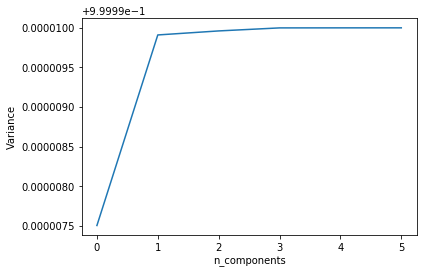

In [18]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Variance');

# data Corroleation 

In [19]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,att1,att2,att3,att4,att5,att6,class
att1,1,-0.850143,0.516263,-0.609249,-0.666205,-0.666857,0.431143
att2,-0.850143,1,-0.00106703,0.616539,0.674785,0.702786,-0.202255
att3,0.516263,-0.00106703,1,-0.143836,-0.164682,-0.119757,0.485343
att4,-0.609249,0.616539,-0.143836,1,0.93776,0.97261,-0.116933
att5,-0.666205,0.674785,-0.164682,0.93776,1,0.948821,-0.0593686
att6,-0.666857,0.702786,-0.119757,0.97261,0.948821,1,-0.10843
class,0.431143,-0.202255,0.485343,-0.116933,-0.0593686,-0.10843,1


# Standard Scaler apply

In [20]:
std_df = StandardScaler().fit_transform(df)

# Apply PCA

In [21]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(std_df)

# Plot the variance of the chosen 3 components

([<matplotlib.axis.XTick at 0x21b5912a608>,
 <a list of 3 Text xticklabel objects>)

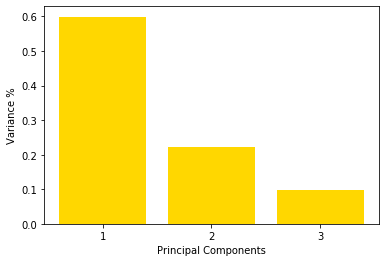

In [22]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

In [23]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2
0,-2.029200,-2.210069,-0.464341
1,-2.158395,-2.266596,-0.381393
2,-2.059150,-2.223157,-0.445173
3,-2.148464,-2.262381,-0.390341
4,-2.102505,-2.241967,-0.412339
...,...,...,...
1995,-0.933705,1.372480,-0.819438
1996,-1.089090,1.304275,-0.726087
1997,-1.705051,1.033268,-0.383958
1998,-1.694891,1.037293,-0.398089


# Split the data after applying PCA

In [24]:
X_train, X_test, y_train, y_test = train_test_split(PCA_components, y, test_size=0.3, random_state=1)

# Train after PCA

In [25]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svclassifier.predict(X_test)

# Print the confusion matrix after apply PCA and compare the difference

In [27]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56  0  1  0  0  0  0  0  0  0]
 [ 0 61  1  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  1  1 57  0  0  0  0  0  0]
 [ 0  0  0  2 65  0  0  0  0  0]
 [ 0  0  0  0  3 51  0  0  0  0]
 [ 0  0  0  0  0  0 61  1  0  0]
 [ 0  0  0  0  1  0  0 56  0  0]
 [ 0  0  0  0  0  0  0  0 65  2]
 [ 0  0  0  0  0  0  0  1  0 60]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        57
           2       0.98      0.98      0.98        62
           3       0.95      1.00      0.97        54
           4       0.97      0.97      0.97        59
           5       0.94      0.97      0.96        67
           6       1.00      0.94      0.97        54
           7       1.00      0.98      0.99        62
           8       0.97      0.98      0.97        57
           9       1.00      0.97      0.98        67
          10       0.97      0.98      0.98        61

    accuracy                           0.98       600
   macro avg       

# Apply decision tree

In [29]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
yp2 = clf.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, yp2))

Accuracy: 0.965


# Apply Ensembel model and voting classifier HARD

In [31]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(random_state = 42)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(random_state=42))])

In [32]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.9016666666666666
RandomForestClassifier 0.97
SVC 0.9266666666666666


C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.9266666666666666


# Apply Ensembel model and voting classifier SOFT

In [33]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft')
voting_clf.fit(X_train, y_train)

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [34]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.9016666666666666
RandomForestClassifier 0.97
SVC 0.9266666666666666


C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.9416666666666667


# Apply Bagging Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [36]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9514285714285714

In [37]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9633333333333334

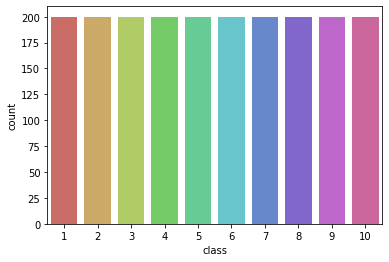

In [40]:
sn.countplot(x='class',data=df, palette='hls')

In [41]:
df['class'].value_counts()

10    200
9     200
8     200
7     200
6     200
5     200
4     200
3     200
2     200
1     200
Name: class, dtype: int64

# Calculate Bias and Variance and Mean square error in different models

In [49]:
model = SVC()
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=20)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 14.253
Bias: 11.048
Variance: 3.205


In [50]:
model = DecisionTreeClassifier()
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=20)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 2.930
Bias: 1.767
Variance: 1.163


In [51]:
model = LogisticRegression()
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=20)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

MSE: 12.435
Bias: 9.889
Variance: 2.545


C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

# Load Imbalanced data

In [52]:
data = pd.read_csv('diabetes_data_upload.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [53]:
label_encoder = preprocessing.LabelEncoder() 

data = data.apply(label_encoder.fit_transform)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [54]:
X2 = data.iloc[:,:-1].values
X2

array([[16,  1,  0, ...,  1,  1,  1],
       [34,  1,  0, ...,  0,  1,  0],
       [17,  1,  1, ...,  1,  1,  0],
       ...,
       [34,  0,  1, ...,  1,  0,  1],
       [ 8,  0,  0, ...,  0,  1,  0],
       [18,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [55]:
y2 = data.iloc[:,16].values
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [56]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

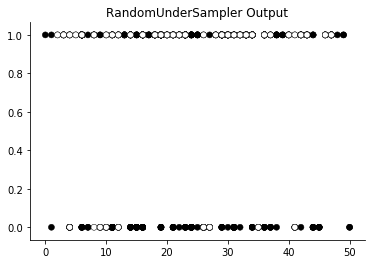

In [57]:
rus = RandomOverSampler(random_state=0)
rus.fit(X2, y2)
X_resampled, y_resampled = rus.fit_sample(X2, y2)
colors = ['white' if v == 0 else 'black' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sn.despine()
plt.title("RandomUnderSampler Output")
pass

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [59]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train2, y_train2)

SVC(kernel='linear')

In [60]:
y_pred2 = svclassifier.predict(X_test2)

In [61]:
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

[[94  4]
 [ 8 86]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        98
           1       0.96      0.91      0.93        94

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



In [62]:
oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=0.8)
X_over, y_over = oversample.fit_resample(X2, y2)
print(Counter(y2))
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X2, y2)
# summarize class distribution
print(Counter(y_over))

Counter({1: 320, 0: 200})
Counter({1: 320, 0: 320})


In [63]:
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [64]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [65]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', SVC())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X2, y2, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.812


In [66]:
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


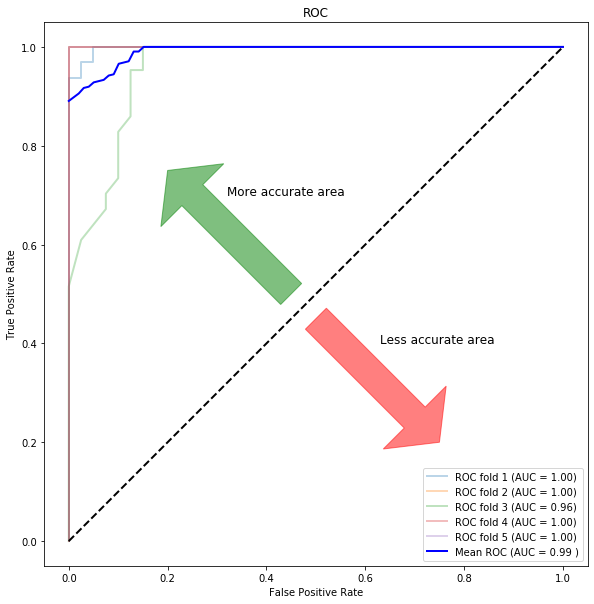

In [67]:
from scipy import interp
import matplotlib.patches as patches
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X2,y2):
    prediction = clf.fit(X2[train],y2[train]).predict_proba(X2[test])
    fpr, tpr, t = roc_curve(y2[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [68]:
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

[[94  4]
 [ 8 86]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        98
           1       0.96      0.91      0.93        94

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



In [69]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = undersample.fit_resample(X2, y2)
print(Counter(y2))
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X2, y2)
print(Counter(y_over))

Counter({1: 320, 0: 200})
Counter({0: 200, 1: 200})


In [70]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X2, y2, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.956


In [71]:
over = RandomOverSampler(sampling_strategy=0.7)
X, y = over.fit_resample(X2, y2)
under = RandomUnderSampler(sampling_strategy=0.8)
X, y = under.fit_resample(X2, y2)
print(Counter(y))

Counter({1: 250, 0: 200})


In [72]:
# define pipeline
over = RandomOverSampler(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X2, y2, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.960


In [73]:
counter = Counter(y)
print(counter)

Counter({1: 250, 0: 200})


In [74]:
from numpy import where

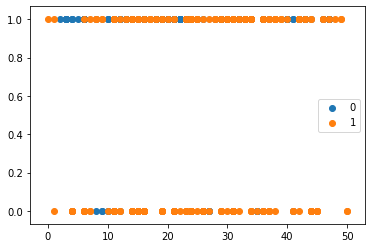

In [75]:
for label, _ in counter.items():
    row_ix = where(y2 == label)[0]
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({1: 320, 0: 200})


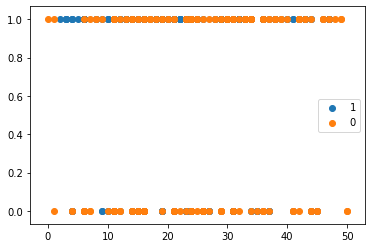

In [76]:
counter = Counter(y2)
print(counter)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X2, y2)
counter = Counter(y2)
print(counter)

Counter({1: 320, 0: 320})


Counter({1: 320, 0: 320})
Counter({1: 320, 0: 320})


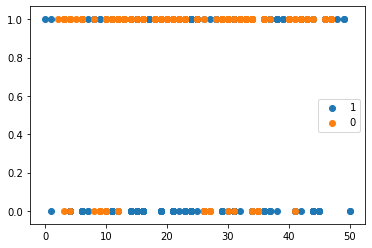

In [79]:
# summarize class distribution
counter = Counter(y2)
print(counter)
# transform the dataset
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X2, y2)
# summarize the new class distribution
counter = Counter(y2)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y2 == label)[0]
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [80]:
data['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

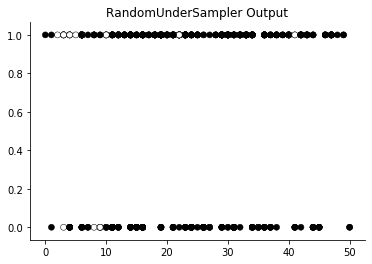

In [81]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X2, y2)
X_resampled, y_resampled = rus.fit_sample(X2, y2)
colors = ['white' if v == 0 else 'black' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sn.despine()
plt.title("RandomUnderSampler Output")
pass

In [82]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
model = SVC()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X2, y2, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.923
